#시작

##코랩 연동

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import os
import glob
import random

import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

from collections import Counter
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 데이터 불러오기

In [36]:
train = pd.read_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/data/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/data/sample_submission.csv')

In [37]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [6]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


## null 값 확인

In [7]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [8]:
test.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

# EDA 직접

In [10]:
train.head(10)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
5,5,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,-13413,-4996,1,0,0,1,High skill tech staff,4.0,-18.0,1.0
6,6,F,N,N,0,315000.0,Working,Secondary / secondary special,Separated,House / apartment,-17570,-1978,1,0,0,1,Core staff,1.0,-41.0,2.0
7,7,M,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14896,-5420,1,0,0,1,Drivers,2.0,-53.0,0.0
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3.0,-38.0,2.0
9,9,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-15785,-1308,1,0,0,0,Medicine staff,2.0,-5.0,2.0


In [11]:
test.head(10)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0
5,26462,F,Y,Y,0,126000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-18458,-2104,1,0,0,0,Core staff,1.0,-5.0
6,26463,F,N,Y,0,585000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18858,-2010,1,0,1,0,NaN,2.0,-1.0
7,26464,F,N,Y,0,141750.0,Pensioner,Higher education,Married,House / apartment,-20345,365243,1,0,1,0,NaN,2.0,-10.0
8,26465,F,N,N,0,225000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19316,-4451,1,1,1,0,NaN,1.0,-23.0
9,26466,M,N,N,0,130500.0,Working,Secondary / secondary special,Single / not married,With parents,-11873,-3504,1,0,0,0,Laborers,1.0,-31.0


In [13]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    credit0 = train[train['credit']==0][feature].value_counts()
    credit1 = train[train['credit']==1][feature].value_counts()
    credit2 = train[train['credit']==2][feature].value_counts()
    df = pd.DataFrame([credit0,credit1, credit2])
    df.index = ['credit0','credit1', 'credit2']
    df.plot(kind='bar',stacked=True)

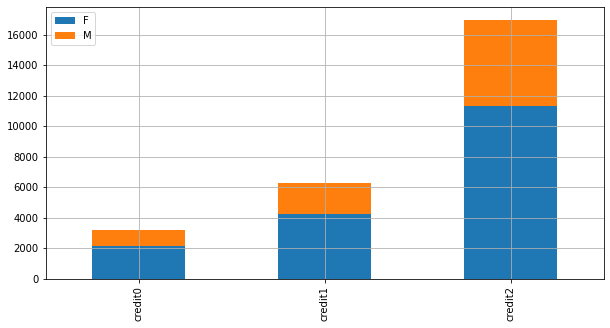

In [38]:
bar_chart('gender')

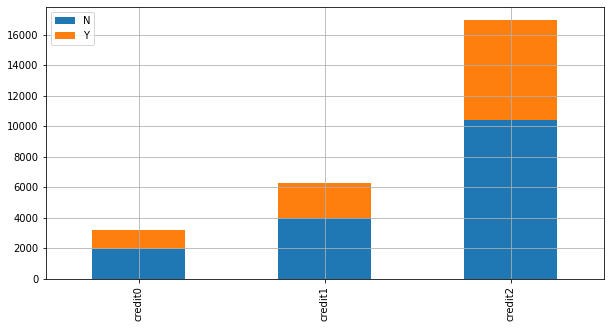

In [39]:
bar_chart('car')

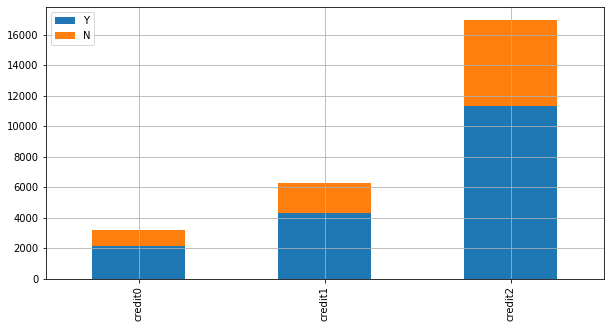

In [42]:
bar_chart('reality')

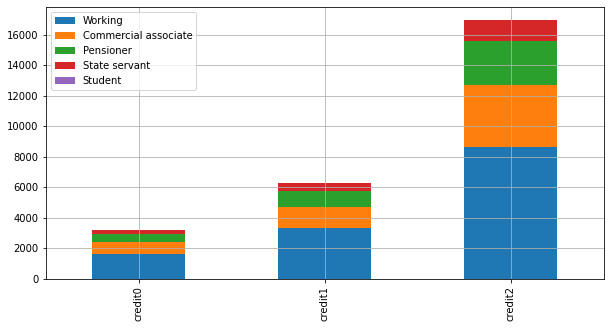

In [44]:
bar_chart('income_type')

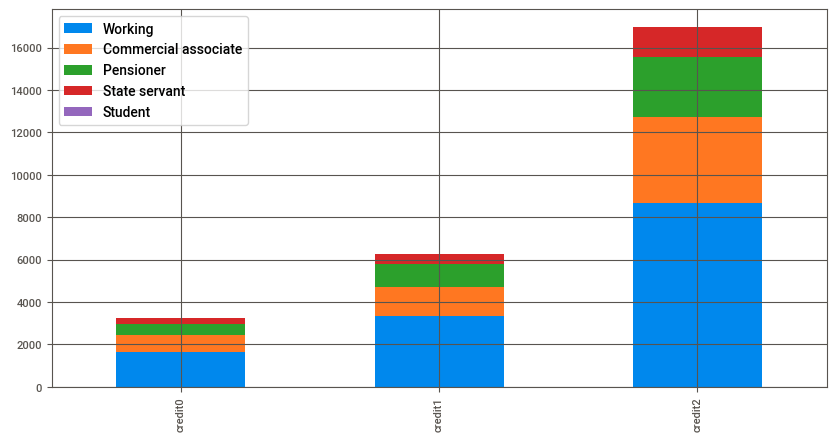

In [14]:
bar_chart('income_type')

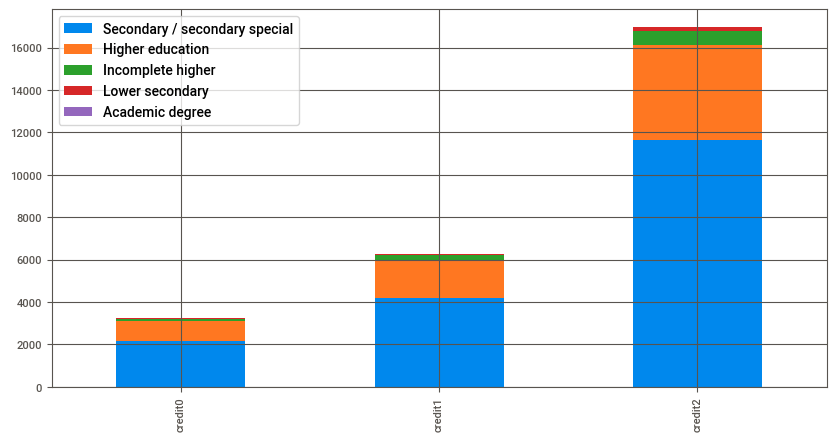

In [16]:
bar_chart('edu_type')

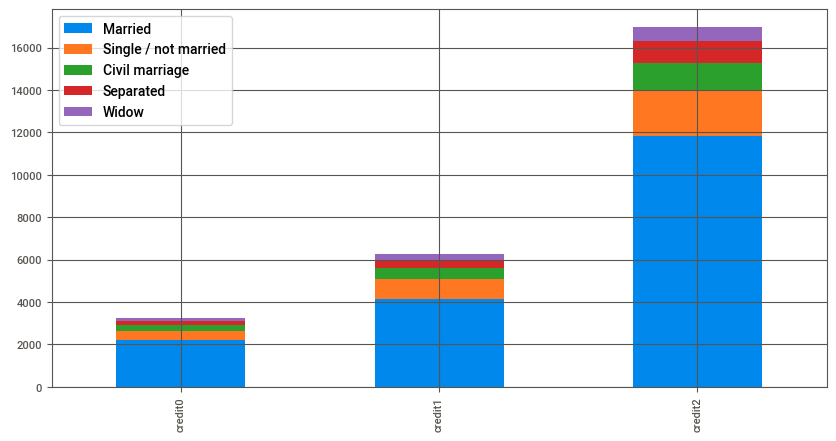

In [17]:
bar_chart('family_type  ')

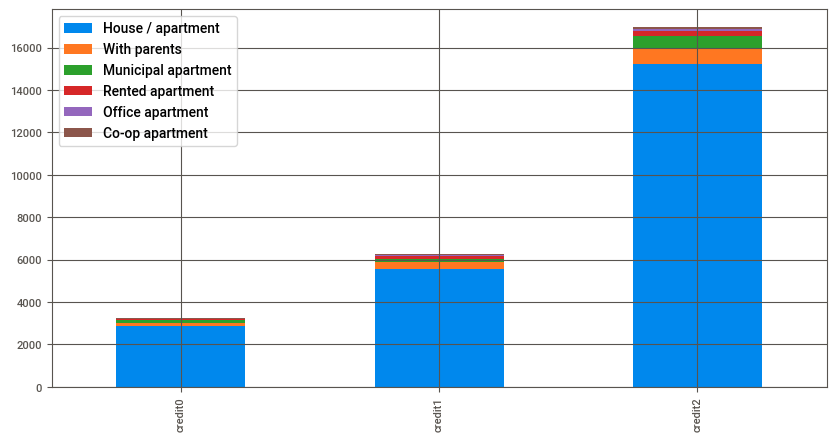

In [18]:
bar_chart('house_type')

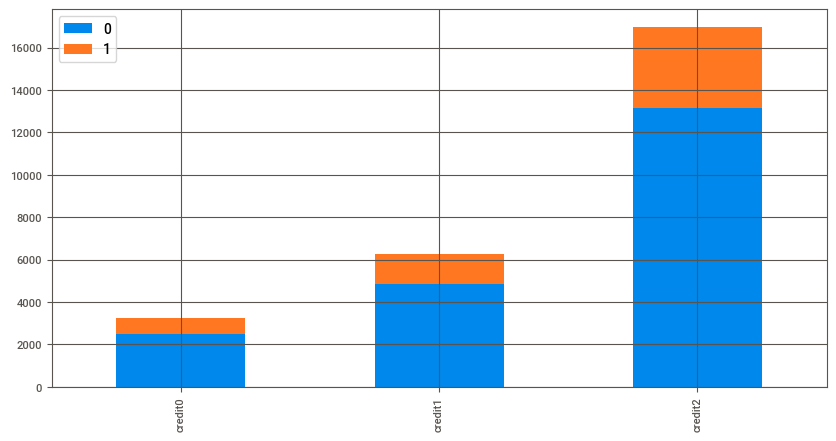

In [15]:
bar_chart('work_phone')

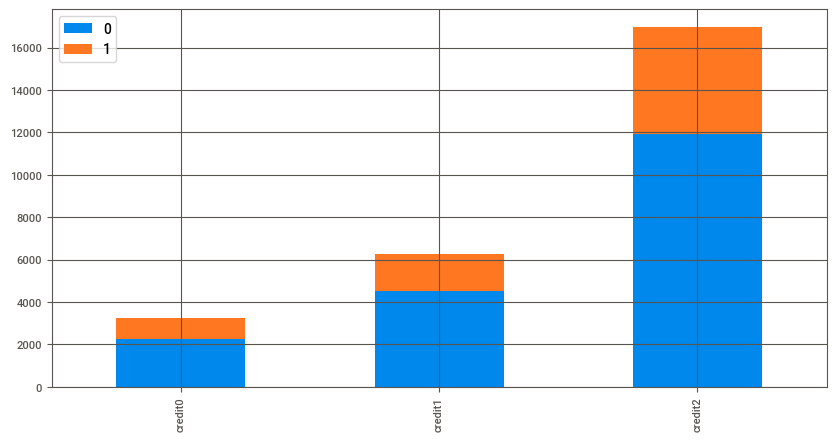

In [19]:
bar_chart('phone')

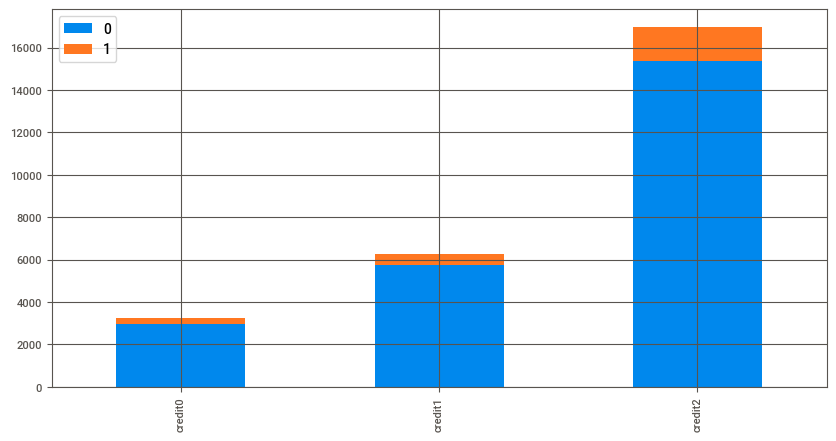

In [20]:
bar_chart('email')

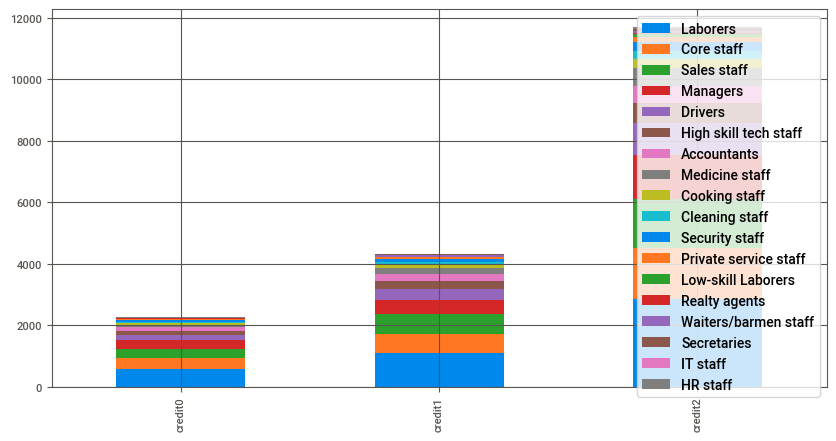

In [21]:
bar_chart('occyp_type')

# EDA (with pandas_profiling)

In [ ]:
pip install pandas==0.25.0

     |████████████████████████████████| 10.4MB 9.6MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 0.25.0 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement pandas>=1.0.4, but you'll have pandas 0.25.0 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [ ]:
! pip show pandas_profiling

Name: pandas-profiling
Version: 1.4.1
Summary: Generate profile report for pandas DataFrame
Home-page: http://github.com/jospolfliet/pandas-profiling
Author: Jos Polfliet
Author-email: jos.polfliet+panpro@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: pandas, six, jinja2, matplotlib
Required-by: 


In [ ]:
from pandas_profiling import ProfileReport
import pandas as pd
import pandas_profiling as pp

profile = pp.ProfileReport(train)
profile

Number of variables,20
Number of observations,26457
Total Missing (%),1.5%
Total size in memory,4.0 MiB
Average record size in memory,160.0 B
Numeric,8
Categorical,8
Boolean,3
Date,0
Text (Unique),0
Rejected,1


In [ ]:
profile.to_file('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/train_eda.html')

In [ ]:
profile2 = pp.ProfileReport(test)
profile2

Number of variables,19
Number of observations,10000
Total Missing (%),1.7%
Total size in memory,1.4 MiB
Average record size in memory,152.0 B
Numeric,7
Categorical,8
Boolean,3
Date,0
Text (Unique),0
Rejected,1


In [ ]:
profile2.to_file('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/test_eda.html')

# EDA with sweetviz

In [1]:
!pip install sweetviz


In [7]:
import sweetviz
report = sweetviz.compare([train,"Train"], [test,"test"])

                                             |          | [  0%]   00:00 -> (? left)

In [47]:
report.show_html('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/sweetviz_eda.html')

NameError: ignored

In [11]:
train['income_total'].isnull().sum()

0

# 데이터 전처리

## 1st (DAYS_BIRTH) & drop

In [38]:
def days_to_age(x):
  return (x*-1)/365

In [39]:
train['DAYS_BIRTH'] = train['DAYS_BIRTH'].apply(days_to_age)
test['DAYS_BIRTH'] = test['DAYS_BIRTH'].apply(days_to_age)

In [40]:
train = train.drop([ 'occyp_type','FLAG_MOBIL'], axis = 1)
test = test.drop(['occyp_type','FLAG_MOBIL'], axis = 1)

In [ ]:
import sweetviz
report1 = sweetviz.compare([train,"Train"], [test,"test"])

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
report1.show_html('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/sweetviz_eda_v1.html')

Report /content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/sweetviz_eda_v1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 2nd (DAYS_EMPLOYED)

In [27]:
train.head(10)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,38.079452,-4709,0,0,0,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,31.178082,-1540,0,0,1,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,52.293151,-4434,0,1,0,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,41.336986,-2092,0,1,0,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,41.197260,-2105,0,0,0,2.0,-26.0,2.0
5,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,36.747945,-4996,0,0,1,4.0,-18.0,1.0
6,F,N,N,0,315000.0,Working,Secondary / secondary special,Separated,House / apartment,48.136986,-1978,0,0,1,1.0,-41.0,2.0
7,M,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,40.810959,-5420,0,0,1,2.0,-53.0,0.0
8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,41.454795,-1466,0,0,1,3.0,-38.0,2.0
9,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,43.246575,-1308,0,0,0,2.0,-5.0,2.0


In [28]:
test.head(10)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month
0,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,60.246575,365243,0,1,0,2.0,-60.0
1,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,51.956164,-8671,0,1,0,2.0,-36.0
2,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,43.526027,-217,1,1,0,2.0,-40.0
3,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,52.794521,-2531,1,0,0,2.0,-41.0
4,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,48.827397,-9385,1,0,0,2.0,-8.0
5,F,Y,Y,0,126000.0,Working,Secondary / secondary special,Single / not married,House / apartment,50.569863,-2104,0,0,0,1.0,-5.0
6,F,N,Y,0,585000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,51.665753,-2010,0,1,0,2.0,-1.0
7,F,N,Y,0,141750.0,Pensioner,Higher education,Married,House / apartment,55.739726,365243,0,1,0,2.0,-10.0
8,F,N,N,0,225000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52.920548,-4451,1,1,0,1.0,-23.0
9,M,N,N,0,130500.0,Working,Secondary / secondary special,Single / not married,With parents,32.528767,-3504,0,0,0,1.0,-31.0


In [41]:
train.loc[train['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = 0
test.loc[test['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = 0

In [42]:
train['DAYS_EMPLOYED'] = -train['DAYS_EMPLOYED']
test['DAYS_EMPLOYED'] = -test['DAYS_EMPLOYED']

In [43]:
def days_to_year(x):
  return (x/365)

In [49]:
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].apply(days_to_year)
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].apply(days_to_year)

In [ ]:
import sweetviz
report2 = sweetviz.compare([train,"Train"], [test,"test"])

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
report2.show_html('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/sweetviz_eda_v2.html')

Report /content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/sweetviz_eda_v2.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 3rd (begin_month) & 중복 이슈 (고민중)


In [54]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,38.079452,12.901370,0,0,0,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,31.178082,4.219178,0,0,1,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,52.293151,12.147945,0,1,0,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,41.336986,5.731507,0,1,0,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,41.197260,5.767123,0,0,0,2.0,-26.0,2.0


In [55]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,60.246575,0.000000,0,1,0,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,51.956164,23.756164,0,1,0,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,43.526027,0.594521,1,1,0,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,52.794521,6.934247,1,0,0,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,48.827397,25.712329,1,0,0,2.0,-8.0


In [57]:
train[train.drop(["index","begin_month"], axis = 1).duplicated(keep = False)].sort_values(["income_total","DAYS_BIRTH","index","begin_month"]).head(20)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
1030,1030,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,55.030137,0.000000,0,0,0,2.0,-6.0,1.0
4797,4797,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,55.030137,0.000000,0,0,0,2.0,-2.0,1.0
15900,15900,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,55.030137,0.000000,0,0,0,2.0,-27.0,1.0
18054,18054,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,55.030137,0.000000,0,0,0,2.0,-24.0,1.0
3172,3172,M,N,Y,0,30150.0,Pensioner,Lower secondary,Married,House / apartment,65.123288,0.000000,0,0,0,2.0,-39.0,2.0
22938,22938,M,N,Y,0,30150.0,Pensioner,Lower secondary,Married,House / apartment,65.123288,0.000000,0,0,0,2.0,-10.0,2.0
1111,1111,F,Y,N,0,31500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,48.663014,21.189041,1,1,0,2.0,-33.0,2.0
2251,2251,F,Y,N,0,31500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,48.663014,21.189041,1,1,0,2.0,-20.0,2.0
5784,5784,F,Y,N,0,31500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,48.663014,21.189041,1,1,0,2.0,-34.0,2.0
11004,11004,F,Y,N,0,31500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,48.663014,21.189041,1,1,0,2.0,-34.0,1.0


### 중복제거(?) 행 12000개 남음

In [58]:
train1 = train.drop(["index","begin_month"], axis = 1).drop_duplicates(keep = 'first')

In [60]:
test = test.drop(["index","begin_month"], axis = 1)

In [61]:
#train1.drop_duplicates(keep='last')
#train1.sort_values(["income_total","DAYS_BIRTH",]).head()
print(train1.shape)
print(test.shape)

(12099, 16)
(10000, 15)


### 중복 제거후 모델 돌려보기

In [62]:
!pip install -U Kaggler
from kaggler.preprocessing import LabelEncoder

     |████████████████████████████████| 829kB 3.9MB/s 
  Created wheel for Kaggler: filename=Kaggler-0.9.4-cp37-cp37m-linux_x86_64.whl size=2958790 sha256=eed15a2ae6ba25eb2f7c71b123b5049526c1d8356c7c9bd8c20f8e22ec20e2ea
  Stored in directory: /root/.cache/pip/wheels/1d/ae/59/59fd57955cbfd28d55e29e0edacb5d7c1fdb5d51aff98bf128
  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-cp37-none-any.whl size=7850 sha256=3f6884e8f558a48cb73395d8d6af0c52c827b95748add95d55ab21279b2cc5e7
  Stored in directory: /root/.cache/pip/wheels/b3/61/2d/776be7b8a4f14c5db48c8e5451451cabc58dc6aa7ee3801163
Successfully built Kaggler ml-metrics


In [63]:
cat_cols = [x for x in train1.columns if train1[x].dtype == 'object']

lbe = LabelEncoder(min_obs=8)

train1[cat_cols] = lbe.fit_transform(train1[cat_cols])
train1.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,credit
0,0,0,1,0,202500.0,2,1,0,2,38.079452,12.901370,0,0,0,2.0,1.0
1,0,0,0,1,247500.0,2,0,2,0,31.178082,4.219178,0,0,1,3.0,1.0
2,1,1,0,0,450000.0,1,1,0,0,52.293151,12.147945,0,1,0,2.0,2.0
3,0,0,0,0,202500.0,2,0,0,0,41.336986,5.731507,0,1,0,2.0,0.0
4,0,1,0,0,157500.0,4,1,0,0,41.197260,5.767123,0,0,0,2.0,2.0


In [64]:
cat_cols = [x for x in test.columns if test[x].dtype == 'object']

lbe = LabelEncoder(min_obs=8)

test[cat_cols] = lbe.fit_transform(test[cat_cols])
test.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size
0,1,1,1,0,112500.0,3,0,2,0,60.246575,0.000000,0,1,0,2.0
1,0,0,0,0,135000.0,4,1,0,0,51.956164,23.756164,0,1,0,2.0
2,0,0,0,0,69372.0,1,0,0,0,43.526027,0.594521,1,1,0,2.0
3,1,1,1,0,112500.0,2,0,0,0,52.794521,6.934247,1,0,0,2.0
4,0,1,0,0,225000.0,4,1,0,0,48.827397,25.712329,1,0,0,2.0


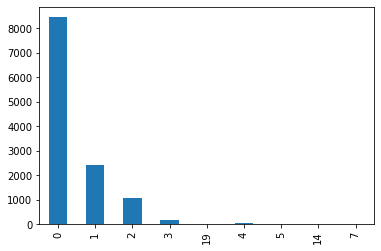

In [ ]:
train1['child_num'].value_counts(sort=False).plot.bar()

In [65]:
train.loc[train['child_num'] >= 2,'child_num']=2
test.loc[test['child_num']>=2, 'child_num']=2

(25451.999, 248142.857]       9992
(248142.857, 469285.714]      1948
(469285.714, 690428.571]       117
(690428.571, 911571.429]        34
(911571.429, 1132714.286]        6
(1132714.286, 1353857.143]       1
(1353857.143, 1575000.0]         1
Name: income_total, dtype: int64


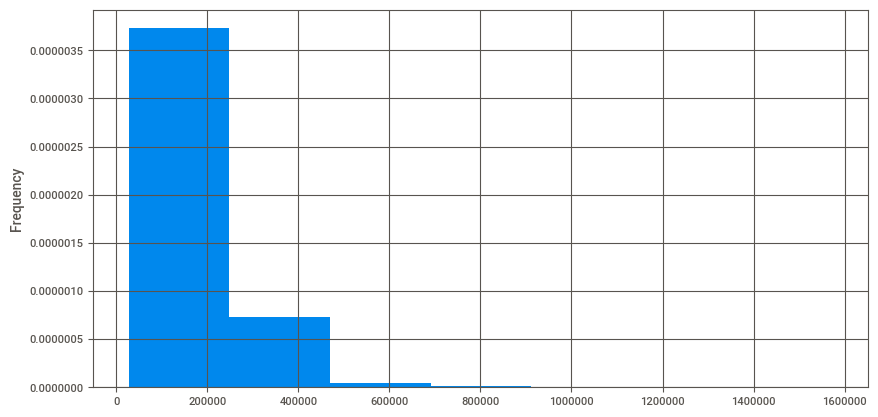

In [68]:
print(train1['income_total'].value_counts(bins=7,sort=False))
train1['income_total'].plot(kind='hist',bins=7,density=True)

In [69]:
count, bin_dividers =np.histogram(train1['income_total'], bins=7)
bin_names=[int(i) for i in range(7) ]
train1['income_total']=pd.cut(x=train1['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True) #pd.cut으로 연속형 자료들을 범주형으로 변환

In [70]:
count, bin_dividers =np.histogram(test['income_total'], bins=7)
bin_names=[int(i) for i in range(7) ]
test['income_total']=pd.cut(x=test['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True) #pd.cut으로 연속형 자료들을 범주형으로 변환

In [71]:
train1.head(10)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,credit
0,0,0,1,0,0,2,1,0,2,38.079452,12.901370,0,0,0,2.0,1.0
1,0,0,0,1,0,2,0,2,0,31.178082,4.219178,0,0,1,3.0,1.0
2,1,1,0,0,1,1,1,0,0,52.293151,12.147945,0,1,0,2.0,2.0
3,0,0,0,0,0,2,0,0,0,41.336986,5.731507,0,1,0,2.0,0.0
4,0,1,0,0,0,4,1,0,0,41.197260,5.767123,0,0,0,2.0,2.0
5,0,0,0,2,1,1,0,0,0,36.747945,13.687671,0,0,1,4.0,1.0
6,0,0,1,0,1,1,0,3,0,48.136986,5.419178,0,0,1,1.0,2.0
7,1,0,0,0,1,2,0,0,0,40.810959,14.849315,0,0,1,2.0,0.0
8,1,1,0,1,0,2,1,0,0,41.454795,4.016438,0,0,1,3.0,2.0
9,0,0,0,0,0,1,0,0,0,43.246575,3.583562,0,0,0,2.0,2.0


(21.061, 29.076]    1405
(29.076, 37.043]    2633
(37.043, 45.01]     2748
(45.01, 52.976]     2204
(52.976, 60.943]    2097
(60.943, 68.91]     1012
Name: DAYS_BIRTH, dtype: int64


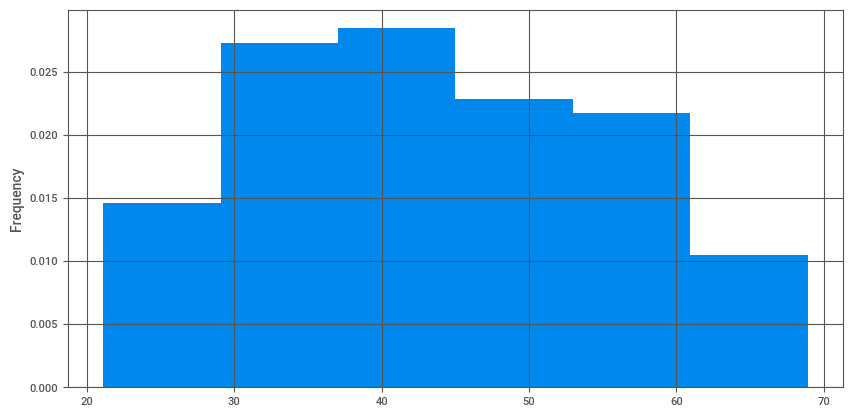

In [72]:
print(train1['DAYS_BIRTH'].value_counts(bins=6,sort=False))
train1['DAYS_BIRTH'].plot(kind='hist',bins=6,density=True)

In [73]:
#DAYS_BIRTH

count, bin_dividers =np.histogram(train1['DAYS_BIRTH'], bins=6)
bin_names=[int(i) for i in range(6) ]
train1['DAYS_BIRTH']=pd.cut(x=train1['DAYS_BIRTH'], bins=bin_dividers, labels=bin_names, include_lowest=True) #pd.cut으로 연속형 자료들을 범주형으로 변환

count, bin_dividers =np.histogram(test['DAYS_BIRTH'], bins=6)
bin_names=[int(i) for i in range(6) ]
test['DAYS_BIRTH']=pd.cut(x=test['DAYS_BIRTH'], bins=bin_dividers, labels=bin_names, include_lowest=True) #pd.cut으로 연속형 자료들을 범주형으로 변환

(-0.044, 4.305]     6367
(4.305, 8.61]       2822
(8.61, 12.915]      1449
(12.915, 17.22]      686
(17.22, 21.525]      349
(21.525, 25.83]      218
(25.83, 30.135]      116
(30.135, 34.439]      54
(34.439, 38.744]      20
(38.744, 43.049]      18
Name: DAYS_EMPLOYED, dtype: int64


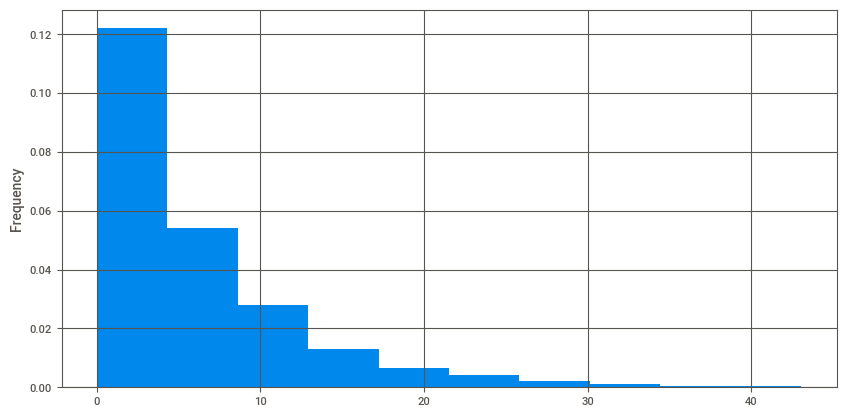

In [74]:
print(train1['DAYS_EMPLOYED'].value_counts(bins=10,sort=False))
train1['DAYS_EMPLOYED'].plot(kind='hist',bins=10,density=True)

In [75]:
#DAYS_EMPLOYED

count, bin_dividers =np.histogram(train1['DAYS_EMPLOYED'], bins=10)
bin_names=[int(i) for i in range(10) ]
train1['DAYS_EMPLOYED']=pd.cut(x=train1['DAYS_EMPLOYED'], bins=bin_dividers, labels=bin_names, include_lowest=True) #pd.cut으로 연속형 자료들을 범주형으로 변환

count, bin_dividers =np.histogram(test['DAYS_EMPLOYED'], bins=10)
bin_names=[int(i) for i in range(10) ]
test['DAYS_EMPLOYED']=pd.cut(x=test['DAYS_EMPLOYED'], bins=bin_dividers, labels=bin_names, include_lowest=True) #pd.cut으로 연속형 자료들을 범주형으로 변환

(0.98, 4.8]     11925
(4.8, 8.6]        171
(8.6, 12.4]         1
(12.4, 16.2]        1
(16.2, 20.0]        1
Name: family_size, dtype: int64


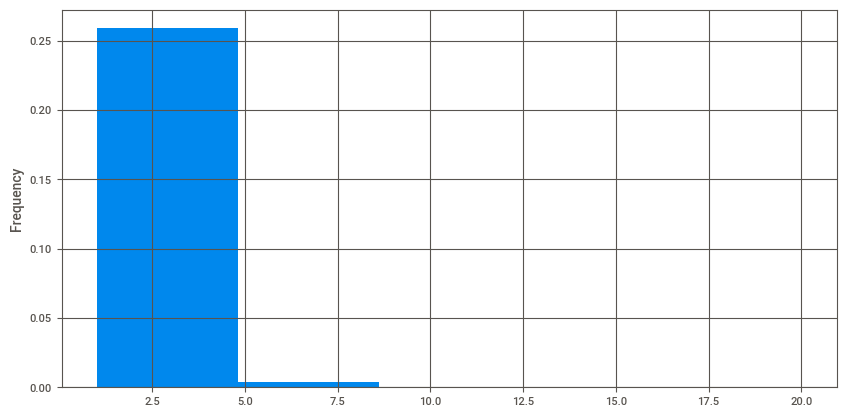

In [77]:
print(train1['family_size'].value_counts(bins=5,sort=False))
train1['family_size'].plot(kind='hist',bins=5,density=True)

In [80]:
train1.head(10)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,credit
0,0,0,1,0,0,2,1,0,2,2,2,0,0,0,1.0
1,0,0,0,1,0,2,0,2,0,1,0,0,0,1,1.0
2,1,1,0,0,1,1,1,0,0,3,2,0,1,0,2.0
3,0,0,0,0,0,2,0,0,0,2,1,0,1,0,0.0
4,0,1,0,0,0,4,1,0,0,2,1,0,0,0,2.0
5,0,0,0,2,1,1,0,0,0,1,3,0,0,1,1.0
6,0,0,1,0,1,1,0,3,0,3,1,0,0,1,2.0
7,1,0,0,0,1,2,0,0,0,2,3,0,0,1,0.0
8,1,1,0,1,0,2,1,0,0,2,0,0,0,1,2.0
9,0,0,0,0,0,1,0,0,0,2,0,0,0,0,2.0


In [81]:
test.head(10)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email
0,1,1,1,0,0,3,0,2,0,4,0,0,1,0
1,0,0,0,0,0,4,1,0,0,3,5,0,1,0
2,0,0,0,0,0,1,0,0,0,2,0,1,1,0
3,1,1,1,0,0,2,0,0,0,4,1,1,0,0
4,0,1,0,0,0,4,1,0,0,3,5,1,0,0
5,0,1,0,0,0,1,0,1,0,3,1,0,0,0
6,0,0,0,0,2,2,0,0,0,3,1,0,1,0
7,0,0,0,0,0,3,1,0,0,4,0,0,1,0
8,0,0,1,0,0,1,0,1,0,4,2,1,1,0
9,1,0,1,0,0,1,0,1,1,1,2,0,0,0


In [82]:
print(train1.shape)
print(test.shape)

(12099, 15)
(10000, 14)


In [83]:
train1 = train1.drop("family_size", axis = 1)
test = test.drop("family_size", axis = 1)

KeyError: ignored

# 간단 lgbm 

In [84]:
train_x=train1.drop('credit', axis=1)
train_y=train1[['credit']]
test_x=test

In [95]:
#lightgbm 파라미터 튜닝
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

estimator = lgb.LGBMClassifier(boosting_type='gbdt',objective='multiclass')
 
param_grid = {
    'learning_rate': [0.01],
    'n_estimators': [10,100,500,1000],
    'max_depth': [5,10,30,50,100]
}
 
grid = GridSearchCV(estimator, param_grid, cv=5)
 
grid.fit(train_x, train_y)
 
print('Best parameters found by grid search are:', grid.best_params_)
#Best parameters found by grid search are: {'learning_rate': 0.05, 'max_depth': 20, 'n_estimators': 600}
#모든 변수 다 넣으면 learning_rate = 0.01, max_depth = 10, n_estimators = 600

#{'learning_rate': 0.01, 'max_depth': 700, 'n_estimators': 100}

Best parameters found by grid search are: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 10}


In [96]:
grid.cv_results_

{'mean_fit_time': array([0.07210379, 0.48463573, 2.29043055, 4.41848636, 0.08186836,
        0.56737394, 2.54161038, 4.77580409, 0.079457  , 0.56575584,
        2.55263233, 4.75698528, 0.08114643, 0.56252375, 2.5240077 ,
        4.74579034, 0.0804503 , 0.56386085, 2.54241605, 4.7651638 ]),
 'mean_score_time': array([0.01622014, 0.04305243, 0.28773794, 0.59439931, 0.01453438,
        0.04625382, 0.27840133, 0.53627772, 0.01539063, 0.04594917,
        0.28409743, 0.52458315, 0.01415009, 0.04641714, 0.28319697,
        0.52527599, 0.01472702, 0.04765782, 0.27288599, 0.52674475]),
 'mean_test_score': array([0.57641126, 0.57641126, 0.57285734, 0.56715441, 0.57641126,
        0.57641126, 0.57260951, 0.56426185, 0.57641126, 0.57641126,
        0.57294005, 0.5643445 , 0.57641126, 0.57641126, 0.57294005,
        0.5643445 , 0.57641126, 0.57641126, 0.57294005, 0.5643445 ]),
 'param_learning_rate': masked_array(data=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
                    0.01, 

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)


clf=LGBMClassifier(learning_rate= 0.01, n_estimators=10, max_depth=5)
clf.fit(X_train, y_train, )
y_pred=clf.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(9074, 14)
(9074, 1)
Validation set: 
(3025, 14)
(3025, 1)
log_loss: 0.9584338135757865


In [102]:
from sklearn.model_selection import KFold, StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical

clf=LGBMClassifier(learning_rate= 0.2, n_estimators=250, max_depth=2500)

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        clf.fit(X_train, y_train)
        
        predictions=clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(clf)

FOLD 0 : logloss:1.135511085680987
FOLD 1 : logloss:1.128166100416483
FOLD 2 : logloss:1.1304203653679485
FOLD 3 : logloss:1.1141406122999777
FOLD 4 : logloss:1.1353044192569646
Mean:1.1287085166044721


In [103]:
submission.loc[:,1:]=my_submission

In [104]:
submission

,index,0,1,2
0,26457,0.236553,0.285506,0.477941
1,26458,0.326761,0.257370,0.415869
2,26459,0.194955,0.292853,0.512191
3,26460,0.273449,0.123220,0.603331
4,26461,0.015845,0.389154,0.595001
...,...,...,...,...
9995,36452,0.126577,0.363551,0.509872
9996,36453,0.177632,0.299983,0.522385
9997,36454,0.078319,0.359573,0.562108
9998,36455,0.217117,0.272003,0.510880


In [ ]:
submission.to_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/중복제거v0.csv', index=False)

# KNeighborsClassifier

In [111]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors= 10)

In [112]:
neigh.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [114]:
submission.loc[:,1:]=neigh.predict_proba(test_x)

In [115]:
submission

,index,0,1,2
0,26457,0.2,0.3,0.5
1,26458,0.4,0.2,0.4
2,26459,0.3,0.3,0.4
3,26460,0.3,0.1,0.6
4,26461,0.2,0.3,0.5
...,...,...,...,...
9995,36452,0.3,0.3,0.4
9996,36453,0.2,0.3,0.5
9997,36454,0.0,0.4,0.6
9998,36455,0.1,0.1,0.8


In [116]:
submission.to_csv('/content/drive/MyDrive/Dacon/신용카드 사용자 연체 예측/submission/knn 간단.csv', index=False)